In [3]:
from evolvepro.src.process import generate_wt, generate_single_aa_mutants
from pathlib import Path

output_dir = Path('/home/nikolenko/work/mipt/EvolvePro/data/dms/wt_fasta')
wt_fasta = output_dir / 'kelsic_WT.fasta'
mutants_fasta = Path('content/output') / 'kelsic.fasta'

generate_wt('MAKEDNIEMQGTVLETLPNTMFRVELENGHVVTAHISGKMRKNYIRILTGDKVTVELTPYDLSKGRIVFRSR', output_file=wt_fasta)
generate_single_aa_mutants(wt_fasta, output_file=mutants_fasta)

Number of mutants: 1369


In [4]:
from evolvepro.src.process import suggest_initial_mutants
#TODO поменять сид

## OН ВЫБИРАЕТ РАНДОМНО
suggest_initial_mutants('content/output/kelsic.fasta', num_mutants=12, random_seed=42)


Suggested 12 mutants for testing:
1. R23K
2. T58E
3. I36D
4. V31C
5. I7A
6. K3F
7. Q10P
8. G38E
9. E4M
10. D61W
11. E4Y
12. R23N


# получили эмбединги для всех мутантов 

In [ ]:
import torch
print(f"GPU available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU device: {torch.cuda.get_device_name()}")

!CUDA_VISIBLE_DEVICES=6 ~/miniforge/envs/plm/bin/python ../evolvepro/plm/esm/extract.py esm2_t48_15B_UR50D content/output/kelsic.fasta content/output/kelsic_esm2_t48_15B_UR50D --toks_per_batch 128 --include mean --concatenate_dir content/output


# PafA

In [ ]:
# data/dms/activity/abf8761_markin_data-s1.csv
# data/dms/wt_fasta/markin_WT.fasta


In [ ]:
#!python scripts/process/dms_process.py

Cutoff values: [2.5, -0.5445838862999997, -0.03819772835000366]
Number above cutoff: [77, 681, 341]
Fractions above cutoff: [0.01130690161527166, 0.1, 0.050073421439060205]
Figure(640x480)
Figure(640x480)
Processing complete for dataset: brenan
Cutoff values: [1, 1.0493792365, 1.23067378445]
Number above cutoff: [905, 745, 373]
Fractions above cutoff: [0.12150912996777659, 0.10002685284640171, 0.05008055853920516]
Figure(640x480)
Figure(640x480)
Processing complete for dataset: giacomelli
Cutoff values: [2.8, 2.8778037803, 3.2372829352999997]
Number above cutoff: [914, 780, 390]
Fractions above cutoff: [0.11717948717948717, 0.1, 0.05]
Figure(640x480)
Figure(640x480)
Processing complete for dataset: jones
Cutoff values: [0.98, 0.9995, 1.0085]
Number above cutoff: [305, 136, 67]
Fractions above cutoff: [0.22295321637426901, 0.09941520467836257, 0.0489766081871345]
Figure(640x480)
Figure(640x480)
Cutoff values: [0.01, -0.00032221609999999977, 0.024974071299999897]
Number above cutoff: [39

Cutoff values: [1400000, 2000000.0, 2200000.0]
Number above cutoff: [35, 35, 33]
Fractions above cutoff: [0.03362151777137368, 0.03362151777137368, 0.03170028818443804]


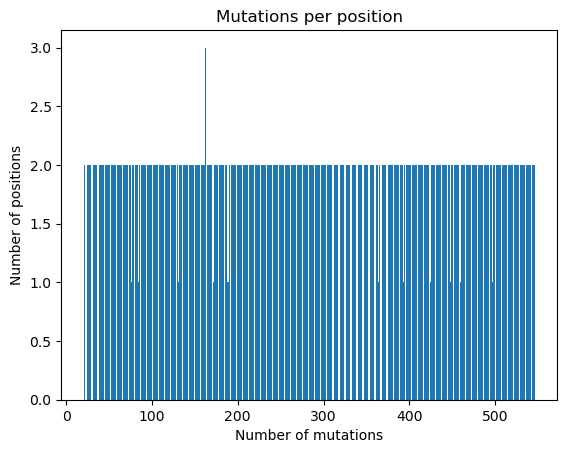

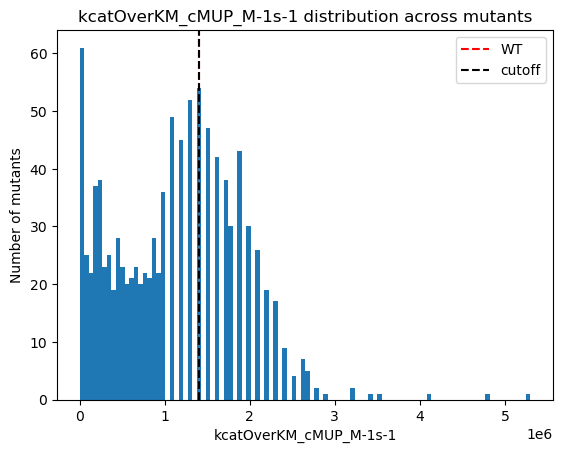

Processing complete for dataset: markin


In [5]:
import pandas as pd
from pathlib import Path
from evolvepro.src.process import process_dataset, plot_mutations_per_position, plot_histogram_of_readout, markin_custom_cutoff

project_root = Path('.')

# Markin
file_path = str(project_root / 'data/dms/activity/abf8761_markin_data-s1.csv')
dataset_name = 'markin'
wt_fasta_path = str(project_root / 'data/dms/wt_fasta/markin_WT.fasta')
activity_column = 'kcatOverKM_cMUP_M-1s-1'
cutoff_value = 1400000
output_dir = project_root / 'output/dms'
cutoff_rule = 'custom'
cutoff_percentiles = [90, 95]
cutoff_function = markin_custom_cutoff
AA_shift = 20
drop_columns = True

# Process the dataset
markin_df, markin_frac = process_dataset(
    file_path=file_path,
    dataset_name=dataset_name,
    wt_fasta_path=wt_fasta_path,
    activity_column=activity_column,
    cutoff_value=cutoff_value,
    output_dir=output_dir,
    sheet_name=None,
    cutoff_rule=cutoff_rule,
    cutoff_percentiles=cutoff_percentiles,
    cutoff_function=cutoff_function,
    AA_shift=AA_shift,
    drop_columns=drop_columns
)

# Print results
plot_mutations_per_position(markin_df)
plot_histogram_of_readout(markin_df, activity_column, cutoff_value)
print(f"Processing complete for dataset: {dataset_name}")

# Save background activity fractions
background_df = pd.DataFrame({
    'markin': markin_frac
}, index=['defined', '90th percentile', '95th percentile'])

background_df = background_df.T
background_df.to_csv(str(output_dir / 'background_df.csv'), index_label='dataset')

In [14]:


# !CUDA_VISIBLE_DEVICES=6 ~/miniforge/envs/plm/bin/python evolvepro/plm/esm/extract.py esm2_t48_15B_UR50D output/dms/markin.fasta results/embeddings/markin_esm2_t48_15B_UR50D --toks_per_batch 1 --include mean --concatenate_dir results/embeddings

!CUDA_VISIBLE_DEVICES=6 ~/miniforge/envs/plm/bin/python evolvepro/plm/esm/extract.py esm2_t36_3B_UR50D output/dms/markin.fasta results/embeddings/markin_esm2_t36_3B_UR50D --toks_per_batch 3 --include mean --concatenate_dir results/embeddings

# !CUDA_VISIBLE_DEVICES=6 ~/miniforge/envs/plm/bin/python evolvepro/plm/esm/extract.py esm2_t6_8M_UR50D output/dms/markin.fasta results/embeddings/markin_esm2_t6_8M_UR50D --toks_per_batch 512 --include mean --concatenate_dir results/embeddings


Transferred model to GPU
Read output/dms/markin.fasta with 1041 sequences
Processing 1 of 1041 batches (1 sequences)
Device: cuda:0
Processing 2 of 1041 batches (1 sequences)
Device: cuda:0
Processing 3 of 1041 batches (1 sequences)
Device: cuda:0
Processing 4 of 1041 batches (1 sequences)
Device: cuda:0
Processing 5 of 1041 batches (1 sequences)
Device: cuda:0
Processing 6 of 1041 batches (1 sequences)
Device: cuda:0
Processing 7 of 1041 batches (1 sequences)
Device: cuda:0
Processing 8 of 1041 batches (1 sequences)
Device: cuda:0
Processing 9 of 1041 batches (1 sequences)
Device: cuda:0
Processing 10 of 1041 batches (1 sequences)
Device: cuda:0
Processing 11 of 1041 batches (1 sequences)
Device: cuda:0
Processing 12 of 1041 batches (1 sequences)
Device: cuda:0
Processing 13 of 1041 batches (1 sequences)
Device: cuda:0
Processing 14 of 1041 batches (1 sequences)
Device: cuda:0
Processing 15 of 1041 batches (1 sequences)
Device: cuda:0
Processing 16 of 1041 batches (1 sequences)
Device

In [18]:
!python scripts/dms/dms_main.py --dataset_name markin --experiment_name esm2_3B_optimal --model_name esm2_t36_3B_UR50D --embeddings_path results/embeddings --labels_path output/dms --num_simulations 3 --num_iterations 10 --measured_var activity --learning_strategies topn --num_mutants_per_round 16 --num_final_round_mutants 16 --first_round_strategies random --embedding_types embeddings --regression_types randomforest --embeddings_file_type csv --output_dir output/dms_results


Embeddings and labels are aligned
Total combinations: 1
Starting labels length: 1041
Starting non-wt length: 1040
iterations considered    variant  iteration
0    R266V          0
1     K51V          0
2    S230G          0
3    N300G          0
4    D257V          0
5     V91G          0
6    F332G          0
7    K261V          0
8    Q277V          0
9    F204V          0
10   I293V          0
11   I451G          0
12   D331G          0
13    L67V          0
14   L323V          0
15   M380G          0
16      WT          0
(1024,)
iterations considered    variant  iteration
0    N300V          1
1    D440V          1
2    R420V          1
3    P450V          1
4    Q363V          1
5    K413G          1
6    P539V          1
7    E374V          1
8    Q386G          1
9    G158V          1
10   G158A          1
11   A382G          1
12   D253V          1
13   G354V          1
14   D284V          1
15   D391V          1
16   R266V          0
17    K51V          0
18   S230G          

In [23]:
!ls output/dms_results

markin_esm2_t36_3B_UR50D_esm2_3B_optimal.csv


In [21]:
!python scripts/plot/dms.py

File cov2_S_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File cas12f_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File zikv_E_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File kelsic_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File brenan_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File stiffler_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File markin_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File giacomelli_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File jones_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File haddox_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File doud_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
File lee_esm2_t48_15B_UR50D_esm2_15B_one_shot.csv not found. Skipping...
Traceback (most recent call last):
  File "/home/nikolenko/work/mipt/EvolvePro/scripts/p

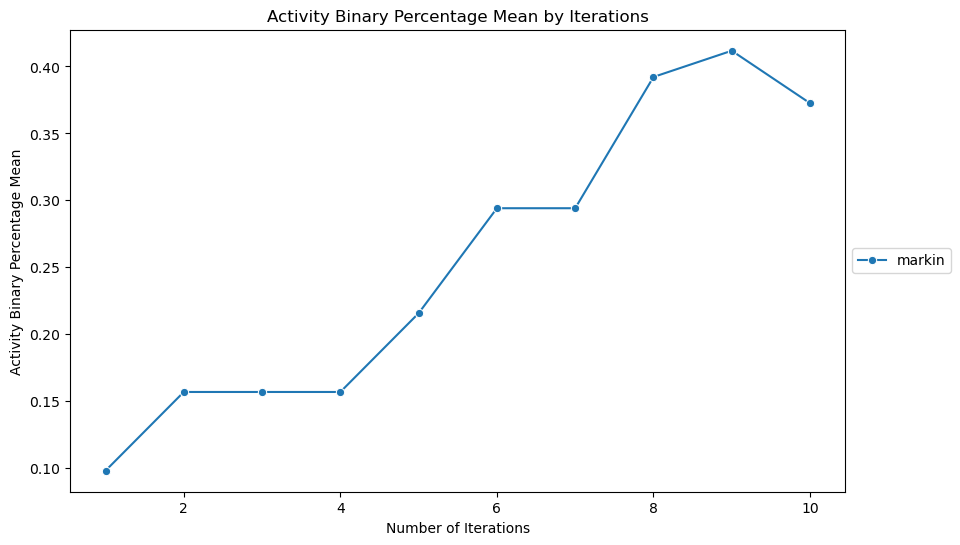

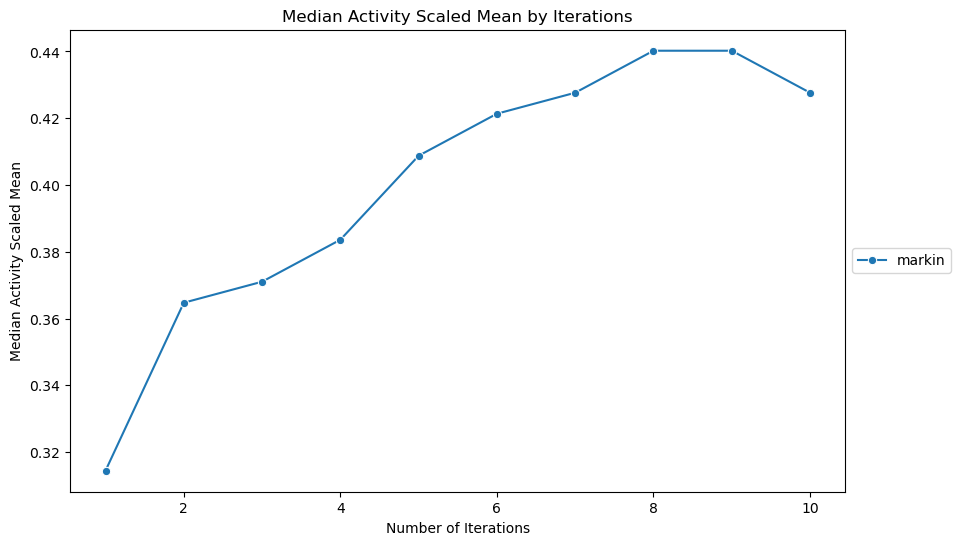

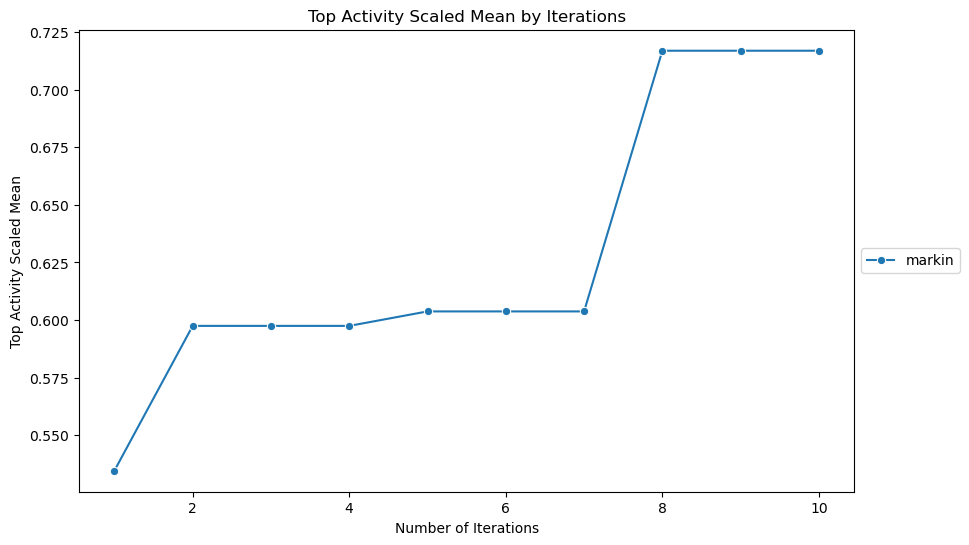

In [24]:
import pandas as pd
import os
from evolvepro.src.plot import (
    read_dms_data,
    filter_dataframe,
    plot_by_round,
    save_dataframe
)

base_dir = "."
data_dir = os.path.join(base_dir, "output/dms_results")
output_dir = os.path.join(base_dir, "output/dms_plots")

df = read_dms_data(
    directory=data_dir,
    datasets=["markin"],
    model="esm2_t36_3B_UR50D",
    experiment="esm2_3B_optimal",
    group_columns=["num_mutants_per_round","round_num"],
    aggregate_columns=["median_activity_scaled","top_activity_scaled","activity_binary_percentage"]
)

save_dataframe(df, output_dir=output_dir, output_file="markin_raw.csv")

plot_by_round(
    df,
    variable="activity_binary_percentage_mean",
    output_dir=output_dir,
    output_file="markin_activity_binary"
)

plot_by_round(
    df,
    variable="median_activity_scaled_mean",
    output_dir=output_dir,
    output_file="markin_median_activity"
)

plot_by_round(
    df,
    variable="top_activity_scaled_mean",
    output_dir=output_dir,
    output_file="markin_top_activity"
)


![Описание изображения](pic2.png)